# Examen PE Discrete

- Alumno: Iván Sotillo del Horno

## Parte B

Estudio de un paseo por popularidad sobre un grafo aleatorio de tipo Barabasi-Albert.


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from barabasi import Barabasi
import time

Try programiz.pro


In [6]:
def simulate_walk(graph, alpha, t_max, max_fraction=1.0):
    """
    Función que simula un paseo por popularidad sobre un grafo.

    Args:
        graph: Lista que representa el grafo.
        alpha: Parámetro de la distribución de probabilidad d_i^alpha.
        t_max: Número máximo de pasos a simular.
        max_fraction: Fracción máxima de nodos visitados, si se alcanza se detiene la simulación. Por defecto 1.0.

    Returns:
        visited_fraction: Lista con la fracción de nodos visitados en cada paso.

    """
    n = len(graph)
    visited = [False] * n
    current_node = random.randint(0, n-1)
    visited[current_node] = True
    visited_fraction = [1 / n]  # Inicialmente 1 nodo visitado

    # print(f'Inicio en nodo: {current_node}')

    for t in range(1, t_max):
        neighbors = graph[current_node]
        # Calcular los grados de los vecinos antes ya que no varían
        node_degrees = [len(graph[neighbor]) for neighbor in neighbors]
        if not neighbors:
            # print(f'Sin vecinos para moverse desde el nodo {current_node}')
            break

        # Calcular grados y probabilidades
        degrees = [node_degrees[i] for i in range(len(neighbors))]
        # Evitar divisiones por 0
        probabilities = [d ** alpha if d > 0 else 1e-9 for d in degrees]
        total_prob = sum(probabilities)
        probabilities = [p / total_prob for p in probabilities]

        # print(f'Tiempo {t}: Nodo actual {current_node}, Vecinos {neighbors}, Grados {degrees}, Probabilidades {probabilities}')

        # Moverse al siguiente nodo
        current_node = random.choices(neighbors, probabilities)[0]
        visited[current_node] = True

        # Actualizar fracción de nodos visitados
        visited_fraction.append(sum(visited) / n)
        # print(f'Tiempo {t}: Nodo visitado {current_node}, Fracción de nodos visitados {visited_fraction[-1]}')

        # Detener la simulación si se alcanza la fracción máxima de nodos visitados
        if visited_fraction[-1] >= max_fraction:
            break

    return visited_fraction

Guardar los resultados y definir parámetros globales.

In [4]:
results = {}
n, m, t_max = 1000, 10, 5000
n_tests = 1000


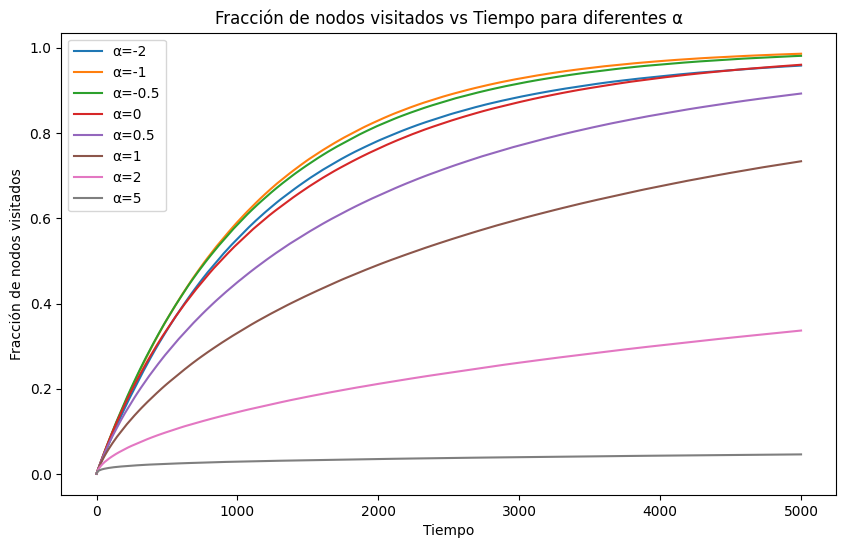

In [5]:
alphas = [-2, -1, -0.5, 0, 0.5, 1, 2, 5]

for alpha in alphas:
    # print(f'Simulando para α={alpha}')
    all_fractions = np.zeros((n_tests, t_max))

    for i in range(n_tests):
        # print(f'  Test {i+1}/{n_tests}')
        graph = Barabasi(n, m)
        fractions = simulate_walk(graph, alpha, t_max)
        all_fractions[i] = fractions

    # Promediar resultados
    mean_fractions = np.mean(all_fractions, axis=0)
    results[alpha] = mean_fractions

# Graficar resultados
plt.figure(figsize=(10, 6))
for alpha, fractions in sorted(results.items()):
    plt.plot(fractions, label=f'α={alpha}')
plt.xlabel('Tiempo')
plt.ylabel('Fracción de nodos visitados')
plt.legend()
plt.title('Fracción de nodos visitados vs Tiempo para diferentes α')
plt.show()

Como podemos observar, para los valores más altos de `alpha` el paseo no llega a explorar mucha fraccción del grafo. Esto es debido a que el paseo se queda en los nodos más populares y no explora el resto del grafo. Sin embargo, para valores más bajos de `alpha` podemos ver como el paseo explora una mayor fracción del grafo en menos tiempo.

Para ver si según reduzcamos el valor de `alpha` el paseo llega a explorar todo el grafo, vamos a realizar un estudio más detallado, como -1 y -0 han sido los mejores valores, añadiremos -0.25, -0.75 y -1.5 para ver si se obtienen mejores resultados, además, vamos a extender el límite inferior de `alpha` de -2 a -4 para ver si se obtienen mejores resultados.

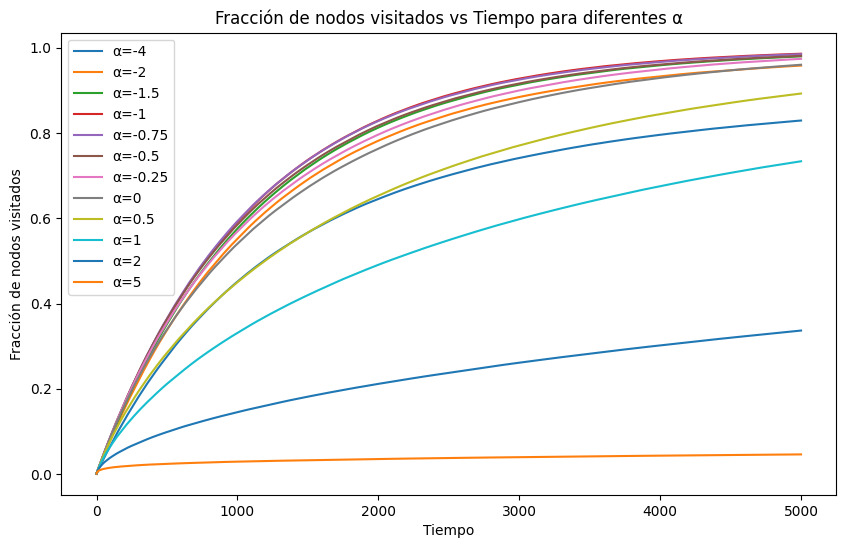

In [6]:
alphas = [-0.25, -0.75, -1.5, -4]

for alpha in alphas:
    # print(f'Simulando para α={alpha}')
    all_fractions = np.zeros((n_tests, t_max))

    for i in range(n_tests):
        # print(f'  Test {i+1}/{n_tests}')
        graph = Barabasi(n, m)
        fractions = simulate_walk(graph, alpha, t_max)
        all_fractions[i] = fractions

    # Promediar resultados
    mean_fractions = np.mean(all_fractions, axis=0)
    results[alpha] = mean_fractions

# Graficar resultados
plt.figure(figsize=(10, 6))
for alpha, fractions in sorted(results.items()):
    plt.plot(fractions, label=f'α={alpha}')
plt.xlabel('Tiempo')
plt.ylabel('Fracción de nodos visitados')
plt.legend()
plt.title('Fracción de nodos visitados vs Tiempo para diferentes α')
plt.show()

Podemos ver que al añadir un valor más extremo como es -4, no hemos conseguido mejorar los resultados, tenemos que recordar que la fórmula de la probabilidad de popularidad es $p_i = \frac{d_i^\alpha}{\sum_{j=1}^{n}d_j^\alpha}$, por lo que si `alpha` es muy negativo, al final lo que estamos consiguiendo es dar en general una probabilidad muy baja a todos los nodos, que, aunque luego se normalice, va a ser un paseo por los nodos con menor grado. Por otro lado, al añadir valores intermedios como -0.25, -0.75 y -1.5, hemos conseguido resultados muy similares a los obtenidos con -1 o -0.5 antes. Para ver cuál es el mejor valor de `alpha` vamos a realizar un estudio del tiempo medio que tarda el paseo en explorar la mitad del grafo en función de `alpha`.

Tiempo promedio para alcanzar fracción 0.5 con α=-4: 1182.333
Tiempo promedio para alcanzar fracción 0.5 con α=-2: 857.388
Tiempo promedio para alcanzar fracción 0.5 con α=-1.5: 804.116
Tiempo promedio para alcanzar fracción 0.5 con α=-1: 770.286
Tiempo promedio para alcanzar fracción 0.5 con α=-0.75: 765.207
Tiempo promedio para alcanzar fracción 0.5 con α=-0.5: 778.776
Tiempo promedio para alcanzar fracción 0.5 con α=-0.25: 812.003
Tiempo promedio para alcanzar fracción 0.5 con α=0: 879.255
Tiempo promedio para alcanzar fracción 0.5 con α=0.5: 1194.041
Tiempo promedio para alcanzar fracción 0.5 con α=1: 2074.726
Tiempo promedio para alcanzar fracción 0.5 con α=2: 0.0
Tiempo promedio para alcanzar fracción 0.5 con α=5: 0.0


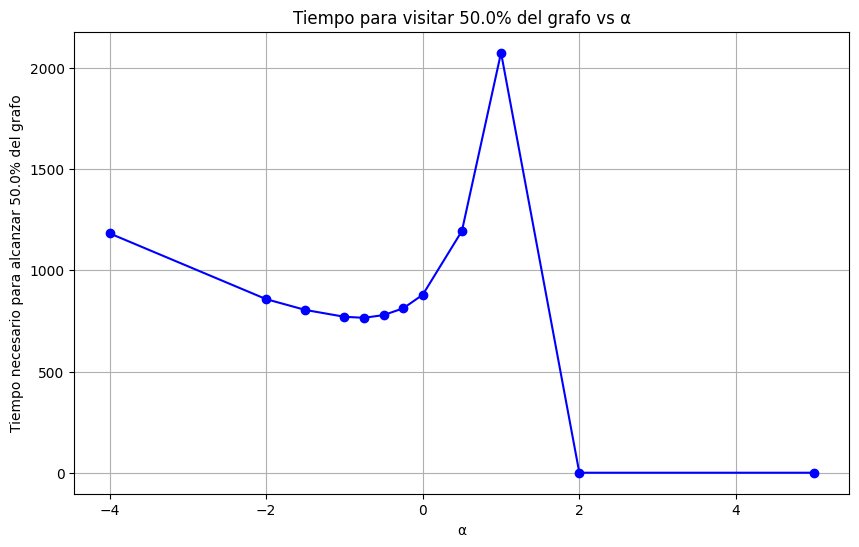

In [7]:
alphas = [-4, -2, -1.5, -1, -0.75, -0.5, -0.25, 0, 0.5, 1, 2, 5]

target_fraction = 0.5
times_to_reach_fraction = np.zeros(len(alphas))

for alpha_idx, alpha in enumerate(alphas):
    # print(f'Simulando para α={alpha}')
    times = np.zeros(n_tests)
    for i in range(n_tests):
        # print(f'  Test {i+1}/{n_tests}')
        graph = Barabasi(n, m)
        fractions = simulate_walk(graph, alpha, t_max, max_fraction=target_fraction)
        time_to_reach_fraction = np.argmax(
            np.array(fractions) >= target_fraction)
        times[i] = time_to_reach_fraction

    mean_time = np.mean(times)
    times_to_reach_fraction[alpha_idx] = mean_time
    print(
        f'Tiempo promedio para alcanzar fracción {target_fraction} con α={alpha}: {mean_time}')

plt.figure(figsize=(10, 6))
plt.plot(alphas, times_to_reach_fraction, marker='o', linestyle='-', color='b')
plt.xlabel('α')
plt.ylabel(f'Tiempo necesario para alcanzar {target_fraction*100}% del grafo')
plt.title(f'Tiempo para visitar {target_fraction*100}% del grafo vs α')
plt.grid()
plt.show()

Tras ver el tiempo necesario para llegar a visitar el 50% del grafo, podemos ver que los valores que mejor se comportan están entre -1 y -0.5, siendo -0.75 el que mejor resultados nos ha dado con un tiempo medio de 767.193 visitas. Además, podemos ver que los valores por debajo de -1 empiezan a tener un tiempo medio mayor, por lo que podemos descartarlos, de igual manera, los valores por encima de -0.5 también empiezan a tener un tiempo medio mayor, en especial a partir de 0, esto es debido a que el paseo se queda en los nodos más populares y no explora el resto del grafo.